In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
file_ext = 'pdf'

In [3]:
pct_err = pd.read_csv(filepath_or_buffer= os.getcwd() + "/ch_pct_err.csv", header= None, index_col= None, names= ["Channel", "Error"])
pct_err = pct_err.to_numpy()

freqs = np.arange(191.6, 195.9, 0.1).tolist()

In [4]:
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

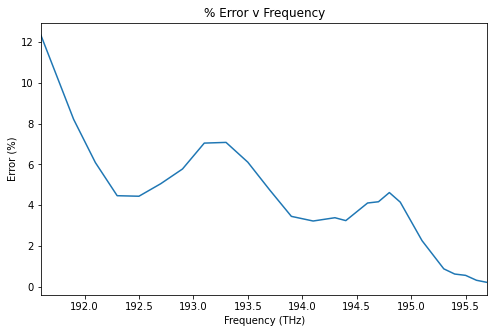

In [5]:
freq = np.array([np.round(freqs[int(i)], 2)  for i in pct_err[:,0]])
fig1, ax1 = plt.subplots(1, figsize = (8,5))
ax1.plot(freq, pct_err[:,1])
#ax1.set_ylim([0, 450])

ax1.set_xlabel('Frequency (THz)')
ax1.set_ylabel('Error (%)')
ax1.set_title('% Error v Frequency')
ax1.set_xlim([freq[0], freq[-1]])

fig1.savefig('{0}.{1}'.format('pct_err_freq',file_ext))


In [14]:
training_log = pd.read_csv(filepath_or_buffer= os.getcwd() + "/og_og_model_training_log.csv", header= 0, index_col= None).to_numpy()

In [11]:
training_log

,epoch,loss,r_squared,val_loss,val_r_squared
0,0,8.334421,-0.078152,6.486315,0.152910
1,1,5.111013,0.338946,3.831578,0.498964
2,2,4.247255,0.449528,3.657264,0.521668
3,3,4.070865,0.471568,3.514615,0.540311
4,4,3.934841,0.489301,3.371561,0.558999
...,...,...,...,...,...
945,945,0.293976,0.961850,0.058345,0.992369
946,946,0.292624,0.962077,0.056212,0.992648
947,947,0.292453,0.962086,0.059985,0.992154
948,948,0.292955,0.962027,0.059824,0.992175


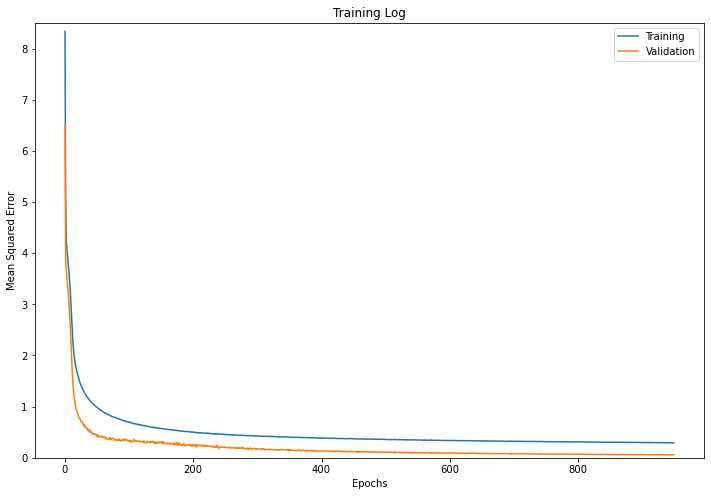

In [24]:
fig2, ax2 = plt.subplots(1, figsize = (12,8))
ax2.plot(training_log[:,1], label='Training')
ax2.plot(training_log[:,3], label='Validation')
#ax1.set_ylim([0, 450])

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Training Log')
ax2.set_ylim([0, 8.5])


plt.legend(loc='best')
plt.show()
fig2.savefig('{0}.{1}'.format('combined_training_log',file_ext))

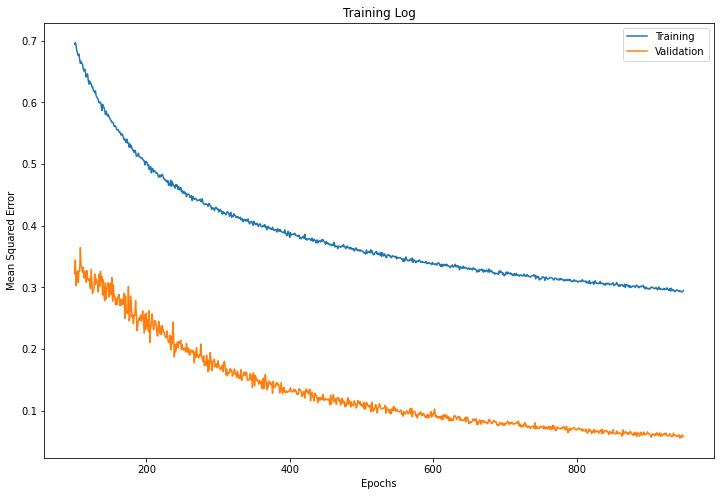

In [33]:
fig3, ax3 = plt.subplots(1, figsize = (12,8))
ax3.plot(np.arange(100,training_log[-1,0] + 1), training_log[100:,1], label='Training')
ax3.plot(np.arange(100,training_log[-1,0] + 1), training_log[100:,3], label='Validation')
#ax1.set_ylim([0, 450])

ax3.set_xlabel('Epochs')
ax3.set_ylabel('Mean Squared Error')
ax3.set_title('Training Log')
ax2.set_title('Training Log')
ax2.set_ylim([0, 0.75])
#fig2.savefig('{0}.{1}'.format('pct_err_freq',file_ext))

plt.legend(loc='best')
plt.show()

fig2.savefig('{0}.{1}'.format('combined_training_log_inset',file_ext))